## Imports

In [1]:
print('')

In [2]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [6]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

## the action!!
For all events with data, load their object . add tp_max and tc  to lists (for plotting)

In [7]:
list_tpmax = []
list_mags = []
list_mag_types = []
list_eq = []
eqs = {}
count = 0

In [ ]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [ ]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

In [8]:
WINDOW_LENGTH = 4
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object_1s_bandpass_01_19_snr_20.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
        if max(eq.calculated_params['tau_p_max'])>1000:
            eq.data.plot()
    except Exception:
        print('in except')
        continue

0
1
in except
2
in except
3
in except
4
in except
5
in except
6
7
in except
8
9
in except
10
11
in except
12
13
in except
14
in except
15
in except
16
in except
17
18
19
in except
20
in except
21
in except
22
in except
23
24
in except
25
in except
26
27
in except
28
29
30
31
32
33
34
in except
35
36
in except
37
38
in except
39
40
in except
41
in except
42
43
in except
44
45
46
47
48
49
in except
50
51
52
53
in except
54
55
in except
56
57
58
59
60
61
62
in except
63
in except
64
in except
65
66
in except
67
68
in except
69
70
71
72
in except
73
74
75
76
77
78
79
in except
80
in except
81
82
83
in except
84
85
86
87
88
in except
89
in except
90
91
in except
92
in except
93
in except
94
in except
95
96
97
98
in except
99
in except
100
101
in except
102
103
104
in except
105
106
107
in except
108
109
110
111
in except
112
in except
113
in except
114
115
in except
116
117
in except
118
119
120
in except
121
in except
122
123
in except
124
125
126
in except
127
in except
128
in except
129


1003
1004
1005
1006
in except
1007
1008
in except
1009
in except
1010
1011
1012
1013
in except
1014
in except
1015
in except
1016
in except
1017
1018
in except
1019
1020
1021
1022
1023
1024
in except
1025
1026
1027
1028
1029
1030
1031
1032
1033
in except
1034
1035
1036
1037
in except
1038
in except
1039
1040
1041
in except
1042
in except
1043
in except
1044
1045
1046
in except
1047
in except
1048
in except
1049
1050
in except
1051
1052
1053
in except
1054
in except
1055
in except
1056
1057
1058
1059
1060
1061
in except
1062
1063
1064
1065
in except
1066
in except
1067
1068
in except
1069
1070
1071
1072
in except
1073
in except
1074
1075
1076
in except
1077
1078
1079
1080
1081
1082
in except
1083
1084
1085
in except
1086
1087
in except
1088
1089
in except
1090
in except
1091
1092
in except
1093
in except
1094
in except
1095
1096
1097
1098
in except
1099
1100
in except
1101
in except
1102
in except
1103
1104
in except
1105
in except
1106
in except
1107
1108
1109
in except
1110
in except


1833
1834
1835
1836
in except
1837
in except
1838
1839
in except
1840
in except
1841
1842
in except
1843
1844
in except
1845
in except
1846
in except
1847
1848
1849
1850
1851
in except
1852
in except
1853
in except
1854
in except
1855
1856
1857
in except
1858
in except
1859
in except
1860
in except
1861
in except
1862
in except
1863
in except
1864
in except
1865
in except
1866
in except
1867
in except
1868
in except
1869
in except
1870
1871
1872
1873
1874
in except
1875
in except
1876
in except
1877
in except
1878
in except
1879
1880
in except
1881
in except
1882
in except
1883
in except
1884
1885
in except
1886
in except
1887
in except
1888
1889
1890
1891
1892
in except
1893
1894
in except
1895
in except
1896
in except
1897
1898
1899
1900
1901
in except
1902
1903
in except
1904
1905
1906
1907
in except
1908
in except
1909
in except
1910
in except
1911
1912
in except
1913
1914
1915
1916
in except
1917
1918
1919
in except
1920
1921
in except
1922
1923
in except
1924
in except
1925
1926


2573
in except
2574
in except
2575
2576
2577
2578
2579
2580
in except
2581
in except
2582
2583
in except
2584
in except
2585
in except
2586
in except
2587
in except
2588
2589
2590
2591
2592
2593
2594
2595
in except
2596
2597
in except
2598
2599
in except
2600
in except
2601
2602
2603
2604
in except
2605
2606
2607
in except
2608
in except
2609
in except
2610
2611
2612
2613
2614
in except
2615
in except
2616
2617
2618
in except
2619
2620
2621
2622
2623
2624
2625
2626
in except
2627
2628
in except
2629
in except
2630
2631
in except
2632
2633
2634
in except
2635
2636
2637
2638
in except
2639
2640
2641
2642
2643
2644
in except
2645
2646
2647
in except
2648
in except
2649
2650
in except
2651
in except
2652
in except
2653
in except
2654
2655
in except
2656
2657
2658
2659
2660
in except
2661
2662
in except
2663
2664
in except
2665
in except
2666
in except
2667
2668
in except
2669
2670
in except
2671
in except
2672
2673
2674
in except
2675
in except
2676
2677
in except
2678
2679
2680
2681
2682


3641
3642
in except
3643
in except
3644
3645
in except
3646
3647
3648
3649
in except
3650
in except
3651
3652
in except
3653
3654
3655
in except
3656
in except
3657
in except
3658
3659
in except
3660
3661
in except
3662
in except
3663
3664
in except
3665
in except
3666
3667
3668
in except
3669
3670
in except
3671
3672
in except
3673
in except
3674
in except
3675
3676
3677
in except
3678
3679
3680
in except
3681
3682
3683
3684
in except
3685
in except
3686
3687
in except
3688
3689
3690
3691
in except
3692
3693
3694
in except
3695
3696
in except
3697
in except
3698
3699
3700
in except
3701
in except
3702
in except
3703
3704
3705
in except
3706
3707
in except
3708
in except
3709
in except
3710
3711
in except
3712
3713
3714
in except
3715
in except
3716
in except
3717
in except
3718
in except
3719
3720
3721
3722
in except
3723
in except
3724
in except
3725
in except
3726
3727
in except
3728
in except
3729
3730
in except
3731
in except
3732
in except
3733
3734
in except
3735
in except
3736


in except
4431
4432
in except
4433
in except
4434
4435
in except
4436
in except
4437
4438
in except
4439
in except
4440
in except
4441
in except
4442
4443
in except
4444
in except
4445
in except
4446
4447
in except
4448
in except
4449
in except
4450
4451
in except
4452
in except
4453
4454
4455
4456
4457
in except
4458
4459
in except
4460
4461
in except
4462
in except
4463
4464
4465
4466
in except
4467
4468
in except
4469
4470
4471
4472
in except
4473
in except
4474
in except
4475
4476
in except
4477
4478
4479
in except
4480
in except
4481
4482
in except
4483
4484
in except
4485
in except
4486
4487
4488
4489
in except
4490
4491
in except
4492
4493
in except
4494
in except
4495
in except
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
in except
4506
in except
4507
in except
4508
4509
in except
4510
4511
4512
in except
4513
4514
4515
in except
4516
4517
in except
4518
4519
4520
in except
4521
in except
4522
in except
4523
in except
4524
in except
4525
4526
in except
4527
in except
4528


in except
5231
in except
5232
5233
in except
5234
in except
5235
in except
5236
in except
5237
5238
in except
5239
in except
5240
in except
5241
5242
5243
5244
5245
5246
5247
in except
5248
in except
5249
5250
5251
5252
in except
5253
in except
5254
in except
5255
in except
5256
in except
5257
in except
5258
5259
5260
5261
in except
5262
5263
5264
in except
5265
in except
5266
in except
5267
in except
5268
in except
5269
in except
5270
5271
in except
5272
in except
5273
in except
5274
in except
5275
5276
in except
5277
in except
5278
5279
in except
5280
in except
5281
in except
5282
5283
in except
5284
in except
5285
in except
5286
in except
5287
5288
in except
5289
5290
5291
in except
5292
in except
5293
5294
in except
5295
in except
5296
in except
5297
in except
5298
in except
5299
5300
in except
5301
5302
in except
5303
in except
5304
in except
5305
in except
5306
in except
5307
5308
in except
5309
in except
5310
5311
in except
5312
in except
5313
in except
5314
in except
5315
in ex

in except
5970
5971
in except
5972
5973
5974
in except
5975
in except
5976
in except
5977
in except
5978
in except
5979
in except
5980
in except
5981
in except
5982
in except
5983
in except
5984
5985
5986
in except
5987
in except
5988
in except
5989
in except
5990
5991
in except
5992
5993
5994
5995
5996
in except
5997
5998
in except
5999
in except
6000
6001
6002
in except
6003
6004
in except
6005
6006
in except
6007
in except
6008
6009
6010
in except
6011
in except
6012
in except
6013
in except
6014
6015
in except
6016
6017
6018
in except
6019
in except
6020
6021
in except
6022
6023
6024
in except
6025
in except
6026
in except
6027
in except
6028
in except
6029
6030
in except
6031
6032
in except
6033
6034
in except
6035
6036
in except
6037
in except
6038
6039
in except
6040
6041
in except
6042
in except
6043
in except
6044
in except
6045
in except
6046
in except
6047
in except
6048
in except
6049
6050
in except
6051
6052
in except
6053
6054
in except
6055
in except
6056
in except
6057


In [29]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = cat.clear()
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')

In [30]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [32]:
cat_with_data

356 Event(s) in Catalog:
2019-01-31T04:40:30.240000Z | +13.464,  -88.366 | 5.2  mb
2019-01-31T00:16:48.840000Z | +23.944, -109.061 | 5.3  Mww
...
2019-11-03T08:06:10.432000Z | -30.645,  -72.115 | 5.2  Mww
2019-11-01T15:24:12.521000Z | +11.571,  -86.791 | 5.3  Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [33]:
WINDOW_LENGTH = 4
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    try:
        with open('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'+eq_with_data[eq_no]+'/eq_object_1s_bandpass_01_19_snr_20.pkl', 'rb') as picklefile:
            eq = pickle.load(picklefile)
        #for num_station in range(0, len(eq.calculated_params['tau_p_max'])):
            #distance = eq.calculated_params['iv2'][num_station][1]
        list_tpmax.append(eq.calculated_params['tau_p_max'])
        list_mags.append(eq.event_stats['eq_mag'])
            #list_dist.append(distance)
        list_mag_types.append(eq.event_stats['eq_mag_type'])
    except Exception:
        print('in except')
        continue

0
1
in except
2
3
in except
4
5
in except
6
in except
7
in except
8
9
in except
10
in except
11
12
13
14
in except
15
in except
16
in except
17
18
19
in except
20
in except
21
in except
22
in except
23
24
in except
25
in except
26
in except
27
in except
28
29
in except
30
31
32
33
34
in except
35
in except
36
in except
37
38
39
40
in except
41
42
43
44
45
46
47
in except
48
in except
49
in except
50
in except
51
in except
52
in except
53
in except
54
in except
55
in except
56
57
in except
58
59
60
61
62
in except
63
in except
64
in except
65
in except
66
in except
67
in except
68
69
70
in except
71
in except
72
in except
73
in except
74
in except
75
in except
76
in except
77
in except
78
79
in except
80
81
82
83
84
in except
85
in except
86
87
in except
88
89
90
in except
91
92
in except
93
94
in except
95
in except
96
in except
97
in except
98
99
100
in except
101
in except
102
in except
103
104
in except
105
106
in except
107
in except
108
in except
109
in except
110
111
112
in excep

In [ ]:
eq.data.plot()

In [9]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [10]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [ ]:
len(np.arange(3, 6.5, 0.1))

In [ ]:
np.linspace(0.2,1,45)

In [11]:
WINDOW_LENGTH=1

3.4 [ 0.18954608 -1.39557785]
1927 1927
[ 0.18954608 -0.44784743] [0.04031332 0.03686872]
1927


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.17593556 -1.34985021]
1379 1379
[ 0.17593556 -0.4701724 ] [0.05001456 0.04856593]
1379


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.18997155 -1.40704313]
1113 1113
[ 0.18997155 -0.45718538] [0.05613881 0.05641547]
1113


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.20292635 -1.46221732]
946 946
[ 0.20292635 -0.44758558] [0.06034461 0.06210002]
946


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.2133554  -1.50244532]
807 807
[ 0.2133554  -0.43566831] [0.06437751 0.06813355]
807


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.21683989 -1.5158971 ]
685 685
[ 0.21683989 -0.43169764] [0.07178213 0.07799285]
685


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.21819786 -1.52403411]
598 598
[ 0.21819786 -0.43304482] [0.07785803 0.08666926]
598


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.22031671 -1.53183812]
557 557
[ 0.22031671 -0.43025458] [0.07986408 0.08958702]
557


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.4 [ 0.22078975 -1.53355567]
513 513
[ 0.22078975 -0.42960692] [0.0825474  0.09348389]
513


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


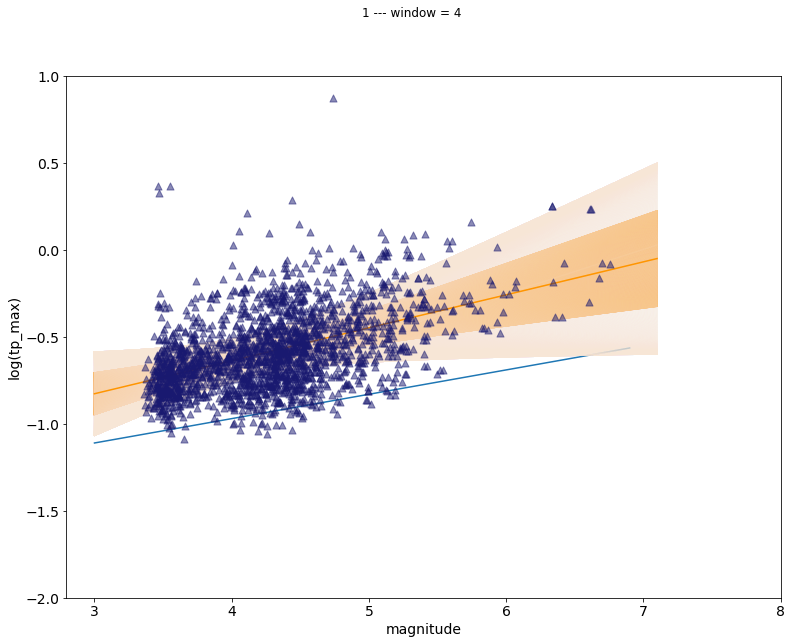

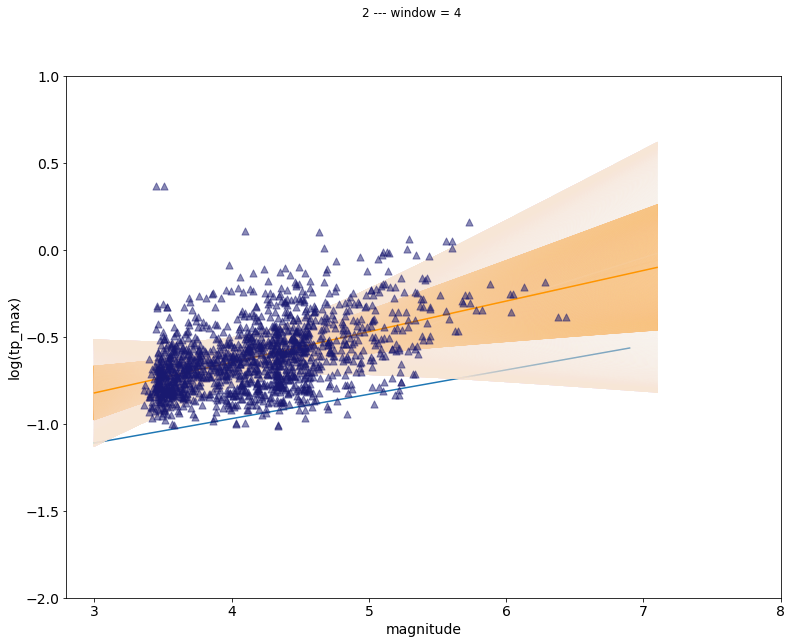

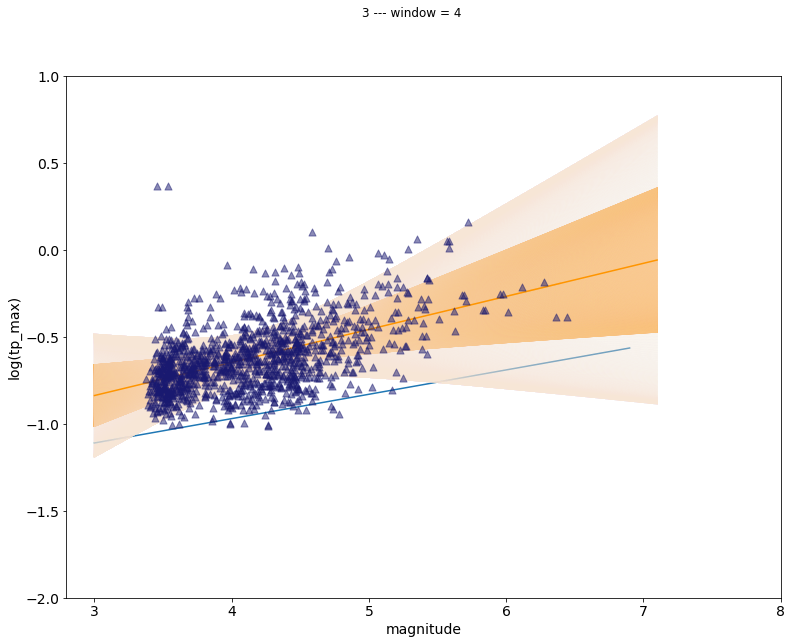

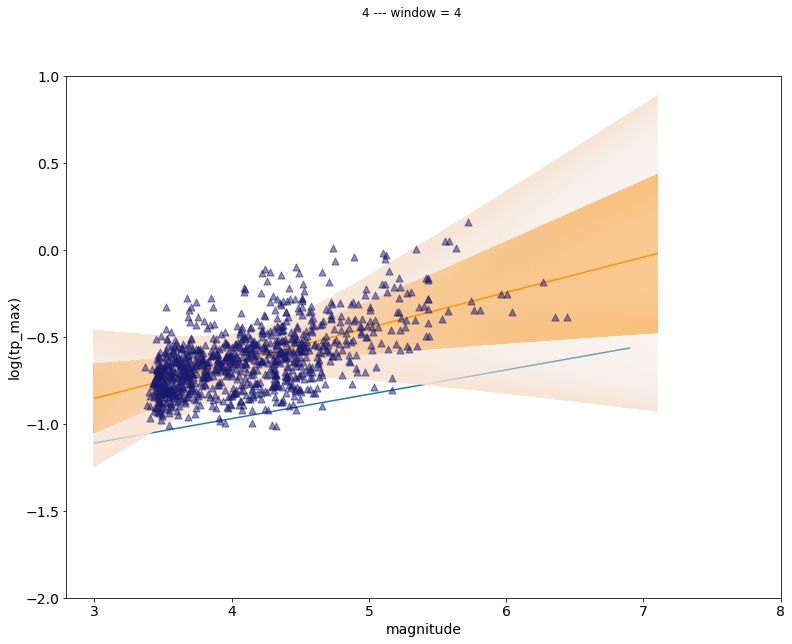

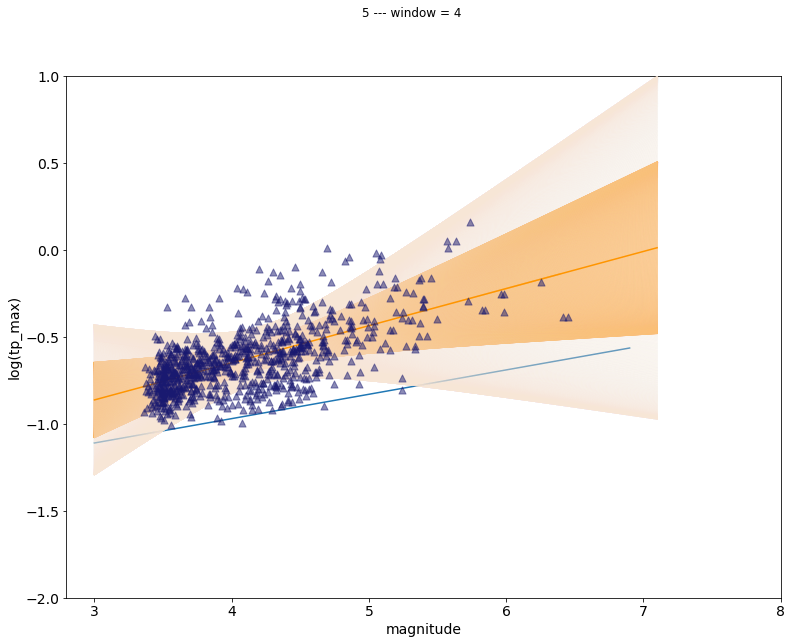

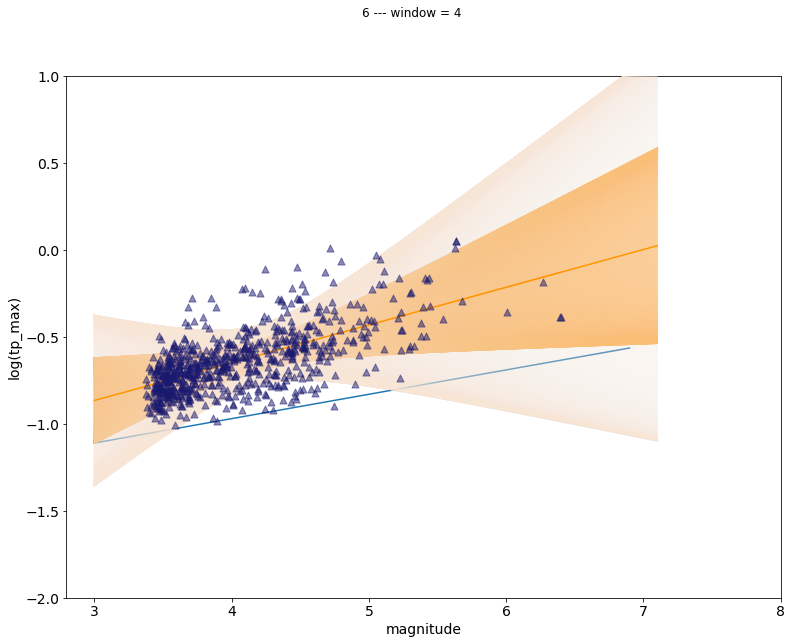

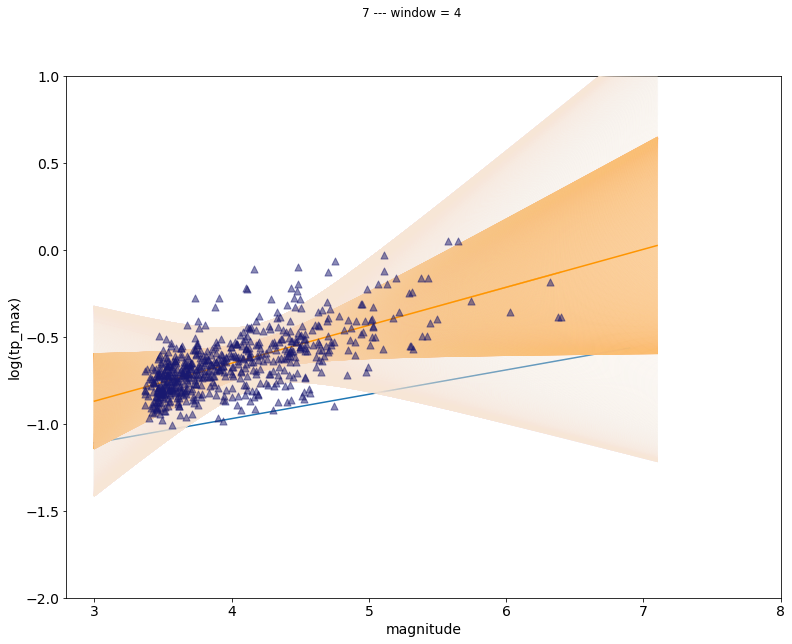

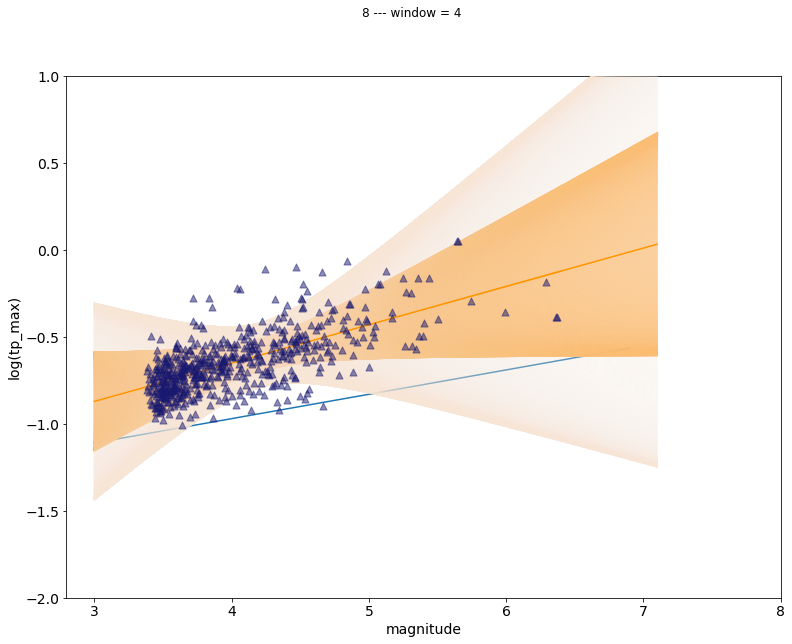

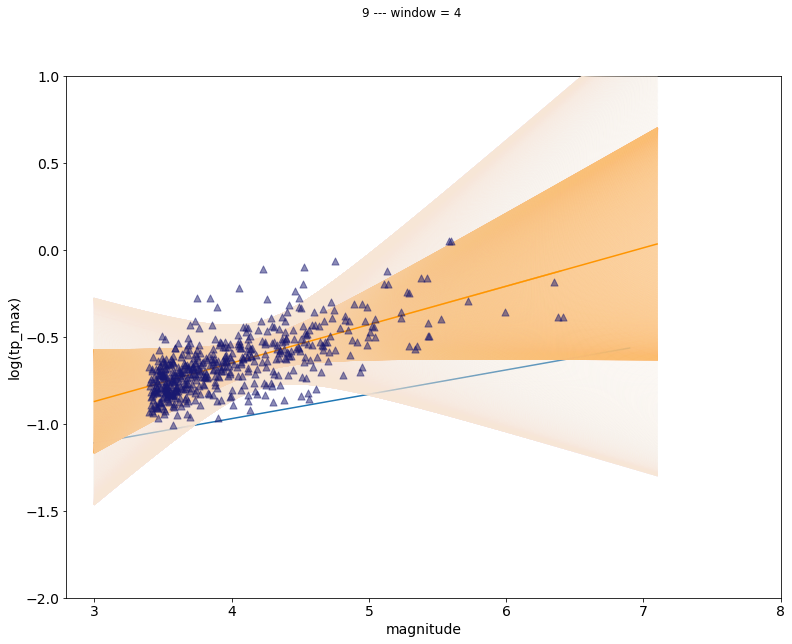

In [56]:
%matplotlib inline
params = []
opacities = np.linspace(0.2,1,45)
import matplotlib.pyplot as plt
cs = ['midnightblue']#'#00a1c1']
#fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
x_aves_tp = []
count = 1
eq_count = 0
medians = [[] for _ in range(0, 45)]
medians_of_medians = [[] for _ in range(0, 45)]
n = 0
median_absolute_deviation = []
sum_absolute_deviation = []
all_abs_deviation = []
for n in range(1, 10):
    med_for_ad = []
    mag_for_ad = []
    fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
    for mag_lim in [3.4]:#, 3.4, 4.0, 4.4]:#np.arange(3.0, 6.5, 0.1):

        #print(mag_lim)
        y_aves_tp = []
        x_aves_tp = []
        for i  in range(0, len(list_mags)):
            #print(i)
            #mag_lim = 3
            #print(list_mags[i])
            #print(list_tpmax[i])
            if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
                if len(list_tpmax[i])>=n:
                #print('in if')
                    mean_tp = np.mean(list_tpmax[i]) 
                    std_tp = np.std(list_tpmax[i]) 
                    y_tp = [] 
                    for j in list_tpmax[i]: 
                        if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                            y_tp.append(math.log(j, 10))
                        elif len(list_tpmax[i])==1:
                            y_tp.append(math.log(j, 10))
                    #print(y_tp)
                    x_tp = np.zeros(len(y_tp))  
                    x_tp = x_tp + list_mags[i]
                    #print(x_tp)
                    c = 0
                    #if str(mag_lim) == str(3):# or mag_lim == 3: or 4.4?
                        #print('in if')
                    #medians_index = int(np.round(x_tp[0],1)*10)-30
                    if len(x_tp)>0 and mag_lim == 3.4:#4.4: # or len(x_tc)>0:
                        if math.isnan(np.median(y_tp))==False:
                            #axs.scatter(np.array(x_tp)+np.random.uniform(-0.05, 0.05), y_tp, s = 15, alpha = 0.2, c = cs[c], marker = '.', zorder =3) 
                        #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
                            axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =110, alpha = 0.5)
                        medians[int(np.round(x_tp[0],1)*10)-30].append(y_tp)#axs[1].scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                        #axs[1].scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                        #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                        #FOR CURVE FITTING
                        med_for_ad.append(np.median(y_tp))
                        mag_for_ad.append(list_mags[i])
                    if math.isnan(np.median(y_tp))==False:  
                        #if np.median(y_tp):
                        y_aves_tp.append(np.median(y_tp))
                        medians_of_medians[int(np.round(x_tp[0],1)*10)-30].append(np.median(y_tp))
                        x_aves_tp.append(list_mags[i])
                    #if math.isnan(np.median(y_tc))==False:
                        #y_aves_tc.append(np.median(y_tc))
                        #x_aves_tc.append(list_mags[i])
        if len(y_aves_tp)>0:
            popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
            params.append([popt, len(x_aves_tp)])
            print(mag_lim, popt)
            #axs.plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = '#003f5c', alpha = opacities[count], zorder =10)
            x_use = np.array(x_aves_tp) - 5
            y_use = np.array(y_aves_tp)
            #for i in range(0,4):
                #x_use = []
                #y_use = []
                #for i in range(0, 10):
                #    x_use.append(x_aves_tp)
                 #   y_use.append(y_aves_tp)
                #y_use = np.concatenate(y_use )  
                #x_use = np.concatenate(x_use )
            if str(mag_lim) == str(3.4):
                popt, pcov = curve_fit(model_function_2, x_use, y_use, absolute_sigma = True)
                axs.plot(np.array(x_use), model_function_2(np.array(x_use), *popt), color='orange', zorder =100)
                popt_final, pcov_final = popt, pcov
            #print(x_aves_tp)
            #print(y_aves_tp)
            print(len(x_aves_tp), len(y_aves_tp))
            # add 2 * std banding
            count += 1
    try:
        med = []
        med_x = []
        med2 = []
        xs = np.arange(3,7.5,0.1)-5
        for i in range(0, len(medians_of_medians)):
            med.append(np.median(medians_of_medians[i]))
            if len(medians_of_medians[i])>0:
                med_x.append(xs[i])
                med2.append(np.median(medians_of_medians[i]))
        #plt.scatter(np.arange(3,7.5,0.1), med, marker = '^', color='silver', zorder = 1000)
        popt, pcov = popt_final, pcov_final
        perr = np.sqrt(np.diag(pcov))
        print(popt, perr)
        x_me = np.arange(0, 7.2, 0.1)
        x_lower_me = x_me - perr[1]*2
        x_upper_me =  x_me + perr[1]*2
        y_me = popt[0]*x_me+popt[1]
        y_lower_me = popt[0]*x_lower_me-popt[1]
        y_upper_me = popt[0]*x_upper_me-popt[1]
        
        a = popt[0]
        a_true = a
        b = popt[1]
        b_true = b
        std_a = perr[0]
        std_b = perr[1]
        x_me = np.arange(3, 7.2, 0.1)-5
        y_1 = (a+std_a)*x_me + (b+std_b)
        y_2 = (a+std_a)*x_me + (b-std_b)
        y_3 = (a-std_a)*x_me + (b+std_b)
        y_4 = (a-std_a)*x_me + (b-std_b)
        
        y_min = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
        y_max = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))
        #y_min = np.minimum(y_2, y_4)
        #y_max = np.maximum(y_2, y_4)
        #axs.fill_between(x_me, y_min, y_max, color = '#8adfff', alpha = 0.52, zorder =1)
        
        #convert mag to index

        #axs[0].plot(x, y_me, color = '')
        #axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
        #axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        #axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        #popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
        #axs.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow', zorder =100)
        #popt, pcov = curve_fit(model_function_2, np.array(med_x[4:21]), np.array(med2[4:21]))
        #axs.plot(med_x[4:21], model_function_2(np.array(med_x[4:21]), *popt), color='yellow', zorder =100, linestyle = '-.')
            # add 2 * std banding
        #axs[0].set_ylim([0.2,2])
        #axs[0].set_yscale('log')
        #axs[1].set_yscale('log')
        #count += 1
        #x = np.arange(3, 7.2, 0.1)
        #y = 0.14*x-0.83
        #axs.plot(x, y, color = '#2a83ab', zorder =12)
        axs.set_xlabel("magnitude", fontsize = 14) 
        #axs[1].set_xlabel("magnitude") 
        axs.set_ylabel("log(tp_max)", fontsize = 14) 
        axs.tick_params(axis='both', which='major', labelsize=14)
        axs.tick_params(axis='both', which='minor', labelsize=14)
        olsen_x = np.arange(3,7,0.1)
        olsen_y = 0.14*(olsen_x-5) - 0.83
        axs.plot(olsen_x-5, olsen_y)
        #axs[1].set_ylabel("tc")
        #axs.set_title("tp_max") 
        #axs[1].set_title("tc") 
        fig.suptitle(str(n)+ " --- window = "+str(WINDOW_LENGTH))
        #axs.fill_between(np.arange(3, 8), np.log10(0.33333), np.log10(10), color = 'grey', alpha = 0.5)
        #axs.fill_between(np.arange(3, 8), np.log10(0.33333), 3, color = 'grey', alpha = 0.2)
        #axs.set_ylim(-1, 1)
    except Exception:
        print('wrong')
    #axs.set_yticks(ticks=list(np.log10([0.1, 0.5,1,2])), labels = [0.1, 0.5,1,2])
    #axs.set_yticks(ticks=list(np.log10(np.arange(0.1, 3, 0.1))))
    point_indices = np.array(mag_for_ad)*10-30
    absolute_deviation = []
    for ind in range(0, len(point_indices)):
        absolute_deviation.append(abs(10**med_for_ad[int(ind)]-(10**y_me[int(point_indices[ind])])))
    print(len(absolute_deviation))
    all_abs_deviation.append(absolute_deviation)
    sum_absolute_deviation.append(np.sum(absolute_deviation))
    median_absolute_deviation.append(np.median(absolute_deviation))
    x = x_me
    eigenvalues, eigenvectors = np.linalg.eig(pcov)
    theta = np.linspace(0, 2*np.pi, 1000);
    ev_95 = np.sqrt(5.99)*np.array([np.sqrt(eigenvalues[0]),np.sqrt(eigenvalues[1])])
    ellipsis_95 = (ev_95 * eigenvectors) @ [np.sin(theta), np.cos(theta)]
    for i in range(0, ellipsis_95.shape[1]):
        b_95 ,a_95 = ellipsis_95[:,i]
        axs.plot(x, (a_95+a_true)*x + (b_95+b_true), color = '#ffb253', alpha = 0.2, zorder = 100)
    for i in range(0, ellipsis_95.shape[1]):
        b_95 ,a_95 = ellipsis_95[:,i]
        axs.plot(x, (2*a_95+a_true)*x + (2*b_95+b_true), color = '#f7e6d6', alpha = 0.1, zorder = 100)
    axs.plot(x, popt[0]*x + popt[1], color = '#ff9500', zorder = 105, alpha = 1)
    axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
    #plt.show()
    axs.set_ylim([-2,1])
    #plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/tp_and_tc/different_station_numbers/1s_bandpass_n_stations_'+str(n)+'_plus_shading_based_on_34_plus.png')

In [57]:
popt

array([ 0.22078975, -0.42960692])

In [58]:
pcov

array([[0.00681407, 0.00680199],
       [0.00680199, 0.00873924]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(pcov)

In [ ]:
eigenvalues

In [ ]:
eigenvalues[0]

In [ ]:
theta = np.linspace(0, 2*np.pi, 1000);
ellipsis = (np.sqrt(eigenvalues[None,:]) * eigenvectors) @ [np.sin(theta), np.cos(theta)]
plt.plot(popt[0]+ellipsis[0,:], popt[1]+ellipsis[1,:])

In [ ]:
len(x_use)

In [ ]:
[np.sqrt(eigenvalues[0]/len(x_use)-1),np.sqrt(eigenvalues[1]/len(x_use)-1)]

In [ ]:
theta = np.linspace(0, 2*np.pi, 1000);
ev_95 = np.sqrt(5.99)*np.array([np.sqrt(eigenvalues[0]/(len(y_tp)-1)),np.sqrt(eigenvalues[1]/(len(y_tp)-1))])
ellipsis_95 = (ev_95 * eigenvectors) @ [np.sin(theta), np.cos(theta)]
plt.plot(ellipsis_95[0,:], ellipsis_95[1,:])

In [ ]:
ev_95

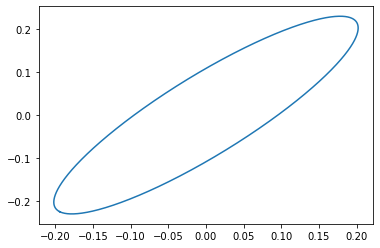

In [59]:
plt.plot(ellipsis_95[0,:], ellipsis_95[1,:])

In [ ]:
popt

##### popt

In [ ]:
eigenvalues[0]/(len(x_use)-1)

In [ ]:
ellipsis_95

In [ ]:
[1/np.sqrt(eigenvalues[0]),1/np.sqrt(eigenvalues[1])]*2.44

In [ ]:
popt[0]*x + popt[1]

In [ ]:
x = np.arange(3,7,0.1)

In [ ]:
for i in range(0, ellipsis.shape[1]):
    b,a = ellipsis[:,i]
    plt.plot(x, a*x + b, color = 'k')
plt.plot(x, popt[0]*x + popt[1], color = 'orange')
axs.scatter(list_mags[i]-5+np.random.uniform(-0.05, 0.05), np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4, alpha = 0.7)

In [ ]:
for i in range(0, ellipsis.shape[1]):
    b,a = ellipsis_95[:,i]
    plt.plot(x, a*x + b, color = 'k')
plt.plot(x, popt[0]*x + popt[1], color = 'orange')

In [ ]:
a

In [ ]:
x_use = []
x_use.append(x_aves_tp)
x_use.append(x_aves_tp)
x_use.append(x_aves_tp)
x_use = np.concatenate(x_use )

In [ ]:
x_use

In [ ]:
np.array(x_aves_tp[-1]).shape

In [ ]:
    point_indices = np.array(mag_for_ad)*10-30
    absolute_deviation = []
    for ind in range(0, len(point_indices)):
        absolute_deviation.append((med_for_ad[int(ind)]-y_me[int(point_indices[ind])]))
    print(max(absolute_deviation))
    #all_abs_deviation.append(absolute_deviation)
    #median_absolute_deviation.append(np.median(absolute_deviation))

In [ ]:
plt.scatter(mag_for_ad, med_for_ad)
plt.scatter(np.arange(0,7.2,0.1), y_me)
plt.scatter(mag_for_ad, absolute_deviation)

In [ ]:
len(np.arange(0,7,0.1))

In [ ]:
max(absolute_deviation)

In [ ]:
median_absolute_deviation

In [ ]:
fig, ax1 = plt.subplots(1,1)
ax1.scatter(range(1,10), median_absolute_deviation)
ax1.set_ylabel('median absolute deviation', color = 'blue')
ax2 = ax1.twinx()
ax2.scatter(range(1,10), sum_absolute_deviation, color = 'orange')
ax2.set_ylabel('sum absolute deviation', color = 'orange')
ax1.set_xlabel('recorded at more than x stations')
plt.title('distances NOT in log space')

In [ ]:
len(median_absolute_deviation)

In [ ]:
b

In [ ]:
std_b

In [ ]:
y_1

In [ ]:
y_2

In [ ]:
y_3

In [ ]:
y_4

In [ ]:
y_min

In [ ]:
y_max

In [ ]:
y_me

In [ ]:
len(list_tpmax)

In [ ]:
model_function_2(np.array(med_x), *popt)

In [ ]:
popt

In [ ]:
for i in range(0, len(medians_of_medians)):
    print(np.median(medians_of_medians[i]))

In [ ]:
plt.scatter(np.arange(3,7.5,0.1), np.median(medians_of_medians))

In [ ]:
popt

In [ ]:
pcov

In [ ]:
gradt = []
intercept = []
for i in params:
    gradt.append(i[0])
    intercept.append(i[1])

In [ ]:
bins

In [ ]:
plt.plot(n)

In [ ]:
%matplotlib qt
# create figure and axis objects with subplots()
fig,axs = plt.subplots(4,1, figsize = (15,9), sharex = True)
ax = axs[0]
ax4 = axs[1]
ax2 = axs[2]
ax3 = axs[3]
# make a plot
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
ax.plot(bins[:-1]+0.05, n, color="red", marker="o")
n, bins = np.histogram(list_mags, bins=np.arange(3,7.5,0.1))
for i in range(1, len(n)):
    n[i] = n[i]+n[i-1]
#ax4 = ax.twinx()
ax4.plot(bins[:-1]+0.05, n, color="red", marker="o")
# set x-axis label
#ax.set_xlabel("year",fontsize=14)
# set y-axis label
#ax.set_ylabel("lifeExp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
#ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(np.arange(3,6.6,0.1),intercept, color="blue",marker="o")
ax2.hlines(-0.83, 3, 7.5, color='blue')
ax3.plot(np.arange(3,6.6,0.1),gradt, color="green",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
ax3.hlines(0.14, 3, 7.5, color='green')

ax.set_yscale('log')
ax4.set_yscale('log')
axs[0].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[0].grid(axis = 'x', which='minor', linestyle=':')
axs[1].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[1].grid(axis = 'x', which='minor', linestyle=':')
axs[2].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[2].grid(axis = 'x',which='minor', linestyle=':')
axs[3].grid(axis = 'both', which='major', linestyle='-', color='darkgrey')
axs[3].grid(axis = 'x', which='minor', linestyle=':')
ax.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax4.minorticks_on()

ax.set_ylabel("log(N)",color="red",fontsize=14)
ax4.set_ylabel("log(cumulative N)",color="red",fontsize=14)
ax2.set_ylabel("intercept",color="blue",fontsize=14)
ax3.set_ylabel("gradient",color="green",fontsize=14)
ax3.set_xlabel('magnitude')
#ax3.set_xlim([3,5])
plt.show()

In [ ]:
plt.axvline()

In [ ]:
plt.hist(list_mags, bins = np.arange(3,7.5,0.1))
plt.yscale('log')
plt.ylabel('log(N)')
plt.xlabel('magnitude')

In [ ]:
x_tp

In [ ]:
y

In [ ]:
min(y_tp)

In [ ]:
x_tp

In [ ]:
plt.figure(figsize=(20,10))
y_limits = np.linspace(min(y_tp), max(y_tp), 40)
x_limits = np.linspace(3, 7, 41)
H, xedges, yedges = np.histogram2d(list(x_tp), list(y_tp), bins=[x_limits, y_limits])
H = H.T

plt.imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], (yedges[0]), (yedges[-1])], aspect = 0.5, cmap = 'inferno', vmin = np.log10(0.5))
plt.colorbar(label = 'log10(histogram amplitude)')

plt.ylabel('log10(tp_max)')
plt.xlabel('magntitude')
plt.ylim([-1,3])

#initial_guess = (1.4,0)
#res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
#x = np.linspace(min(mag_plot), max(mag_plot), 20)
#y = res.x[0] * x + res.x[1]
#plt.plot(x,y, label = str(res.x[0]) + '*x+'+ str(res.x[1]))
#plt.scatter(np.arange(3, 6.8, 0.1), np.log10(mag_bin_medians), marker = 'x', color = 'silver')


plt.scatter(med_x, med2, marker = '^', color='silver', zorder = 1000)

popt, pcov = curve_fit(model_function_2, np.array(med_x[4:20]), np.array(med2[4:20]))
plt.plot(med_x[4:20], model_function_2(np.array(med_x[4:20]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:28]), np.array(med2[20:28]))
plt.plot(med_x[20:28], model_function_2(np.array(med_x[20:28]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x[20:]), np.array(med2[20:]))
plt.plot(med_x[20:], model_function_2(np.array(med_x[20:]), *popt), color='yellow', linestyle = '-.')
popt, pcov = curve_fit(model_function_2, np.array(med_x), np.array(med2))
plt.plot(med_x, model_function_2(np.array(med_x), *popt), color='yellow')

plt.show()

In [ ]:
popt

In [ ]:
x_tp = []
y_tp = []
for i  in range(0, len(list_mags)):
    mag_lim = 3.4
    count = 0
    if list_mags[i] > mag_lim and list_mags[i]<=max(list_mags):
        mean_tp = np.mean(list_tpmax[i]) 
        std_tp = np.std(list_tpmax[i]) 
        for j in list_tpmax[i]: 
            if j > mean_tp-2*std_tp and j < mean_tp + 2*std_tp:# and j < 100: 
                y_tp.append(math.log(j, 10))
                count += 1
            elif len(list_tpmax[i])==1:
                y_tp.append(math.log(j, 10))
                count += 1

        x_mag = np.zeros(count)  
        x_mag = x_mag + list_mags[i]
        x_tp = np.concatenate((np.array(x_tp), np.array(x_mag)))


In [ ]:
x_mag

find location of tpmax in time

In [ ]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [ ]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
print(len(eq_with_data))

In [ ]:
eq.data[0].stats['sampling_rate']

In [ ]:
eq.data

In [ ]:
eq.data_stats['picks']

In [ ]:
eq.data[0].stats

In [ ]:
eq.data[0].stats.network+'.'+eq.data[0].stats.station+'.'+eq.data[0].stats.location

In [ ]:
eq.data

In [ ]:
%matplotlib qt 
WINDOW_LENGTH = 4
diff = []
for eq_no in range(0, len(eq_with_data)):
    print(eq_no)
    #try:
    with open('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'+eq_with_data[eq_no]+'/eq_object.pkl', 'rb') as picklefile:
        eq = pickle.load(picklefile)
        keys = list(eq.data_stats['picks'].keys())
        #print(eq.data)
        for i in range(len(eq.calculated_params['tau_p_max'])):
            
            name = eq.data[i*3+2].stats.network+'.'+eq.data[i*3+2].stats.station+'.'+eq.data[i*3+2].stats.location
            if name in eq.data_stats['picks'].keys():
                #print(eq.data[i*3].stats.network+'.'+eq.data[i*3].stats.station+'.'+eq.data[i*3].stats.location)
                #eq.data[i*3].plot()
                pick = (eq.data_stats['picks'][name]-eq.data[i*3+2].stats.starttime)*eq.data[i*3+2].stats.sampling_rate
                #plt.plot(eq.calculated_params['tau_p'][i])
                #plt.axhline(eq.calculated_params['tau_p_max'][i], 0, 1000)
                #plt.show()
                pick_seconds = pick / (eq.data[i*3].stats['sampling_rate'])
                a = np.where(eq.calculated_params['tau_p'][i][int(pick):]==eq.calculated_params['tau_p_max'][i])
                if len(a[0])>0:
                    max_loc = a[0][0]* 100/(eq.data[i*3+2].stats['sampling_rate'])+pick * 100/(eq.data[i*3+2].stats['sampling_rate'])
                    #print(eq.data[i*3])
                    if abs(max_loc-pick* 100/(eq.data[i*3+2].stats['sampling_rate'])) < 4 * eq.data[i*3].stats['sampling_rate']:
                        #eq.data[i*3+2].plot()
                        #plt.plot(eq.calculated_params['tau_p'][i][int(pick):])
                        #plt.axhline(eq.calculated_params['tau_p_max'][i], 0, 1000)
                        #plt.show()
                        #print(i)
                        #print(eq.calculated_params['tau_p_max'][i])
                        #print(max(eq.calculated_params['tau_p'][i][int(pick)+50:int(pick)+400]))
                        #print(eq.data[i*3+2].stats.sampling_rate)
                        #print(pick)
                        #print(max_loc)
                        #print(max_loc-pick* 100/(eq.data[i*3].stats['sampling_rate']))
                        diff.append((max_loc-pick*100/(eq.data[i*3].stats['sampling_rate']))/100)
    #list_tpmax.append(eq.calculated_params['tau_p_max'])

    #except Exception:
    #    print('in except')
    #    continue

In [ ]:
a[0][0]

In [ ]:
eq.calculated_params['tau_p_max'][i]

In [ ]:
max(diff)

In [ ]:
plt.hist(diff, np.arange(0, 4, 0.1))
plt.ylabel('time from pick')
plt.xlabel('n')
plt.title('timing of tpmax')

In [ ]:
a

In [ ]:
eq.calculated_params['tau_p'][i][int(pick):]

In [ ]:
eq.calculated_params['tau_p_max'][i]